# Task-3 :- Data Science and Business Analytics

By Arcot Harish Intern at The Sparks Foundation

Task(Beginner):- To perform Exploratory Analysis in 'SampleSuperstore' dataset

# Importing the relevant libraries

In [23]:
#Here we import the libraries that requires to complete this task
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#To ignore warnings
import warnings as wg
wg.filterwarnings("ignore")

# Reading the dataset

In [6]:
dataset = pd.read_csv('SampleSuperstore.csv')

In [7]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data Preprocessing

In [8]:
#Here we display number of rows and columns in our dataset
dataset.shape

(9994, 13)

In [9]:
#To display information of our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [11]:
#To display columns of our dataset'
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
#To check whether our dataset contains any null values
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
#To describe our dataset
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [14]:
#Checking duplicate values
dataset.duplicated().sum()

17

In [17]:
#To remove duplicate values
dataset.drop_duplicates()
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [21]:
#Removal of unnecessary columns
dataset = dataset.drop(['Postal Code'],axis=1)

In [22]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploratory data analysis

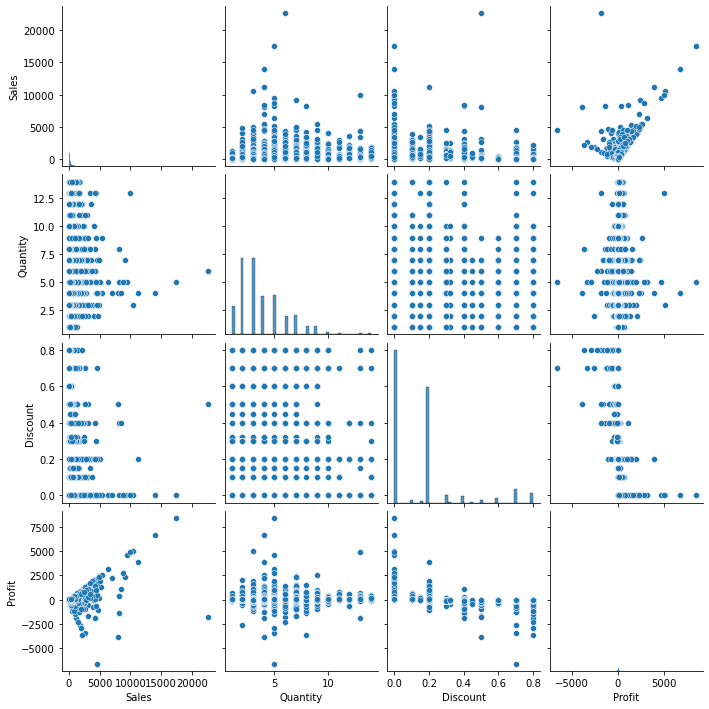

In [24]:
#Visualizing the dataset as whole pairplot
sns.pairplot(dataset)

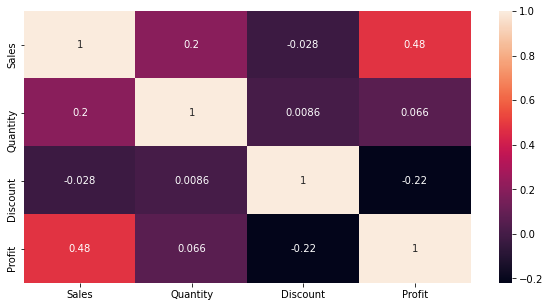

In [26]:
#Finding the pairwise correlation using heatmaps
dataset.corr()
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

# Visualizing the categories

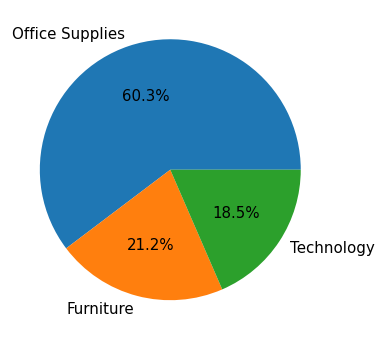

In [30]:
plt.figure(figsize=(6,6))
textprops = {"fontsize": 15}
plt.pie(dataset['Category'].value_counts(), labels=dataset['Category'].value_counts().index, autopct='%1.1f%%', textprops=textprops)
plt.show()

<Figure size 720x1152 with 0 Axes>

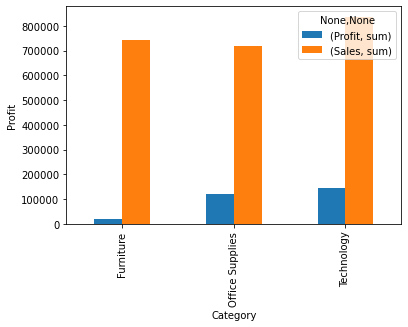

In [31]:
plt.figure(figsize = (10,16))
dataset.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

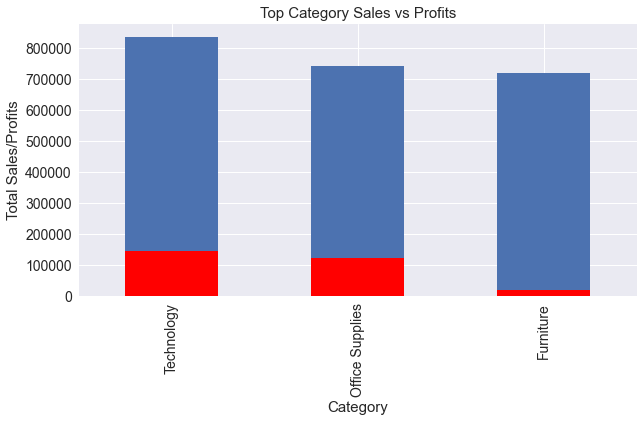

In [33]:
#Computing  the top categories in terms of sales from first 100 observations
top_category_s = dataset.groupby("Category").Sales.sum().nlargest(n=100)
#Computing  the top categories in terms of profit from first 100 observations
top_category_p = dataset.groupby("Category").Profit.sum().nlargest(n=100)

#Plotting to see it visually
plt.style.use('seaborn')
top_category_s.plot(kind='bar', figsize=(10,5), fontsize=14)
top_category_p.plot(kind='bar', figsize=(10,5), fontsize=14, color='red')
plt.xlabel('Category',fontsize=15)
plt.ylabel('Total Sales/Profits', fontsize=15)
plt.title('Top Category Sales vs Profits', fontsize=15)
plt.show()

# Visualizing the subcategories

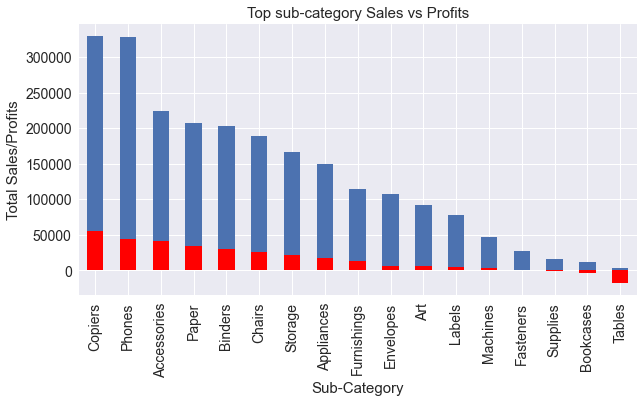

In [38]:
#Computing  the top subcategories in terms of sales from first 100 observations
top_subcategory_s = dataset.groupby("Sub-Category").Sales.sum().nlargest(n=100)
#Computing  the top subcategories in terms of profit from first 100 observations
top_subcategory_p = dataset.groupby("Sub-Category").Profit.sum().nlargest(n=100)

#Plotting to see it visually
plt.style.use('seaborn')
top_subcategory_s.plot(kind='bar', figsize=(10,5), fontsize=14)
top_subcategory_p.plot(kind='bar', figsize=(10,5), fontsize=14, color='red')
plt.xlabel('Sub-Category',fontsize=15)
plt.ylabel('Total Sales/Profits', fontsize=15)
plt.title('Top sub-category Sales vs Profits', fontsize=15)
plt.show()

<AxesSubplot:ylabel='Sub-Category'>

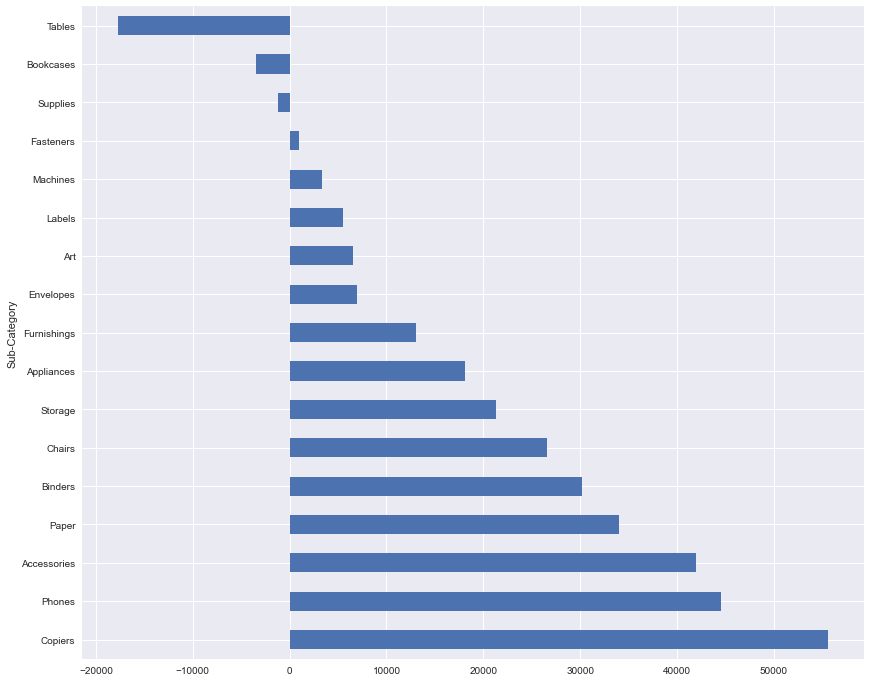

In [43]:
#A more detailed view
plt.figure(figsize = (14,12))
statewise = dataset.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh()# h for horizantal

Above graph clearly shows that copiers and phons have highest profit and tables has negative profit

# Visualizing discount

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

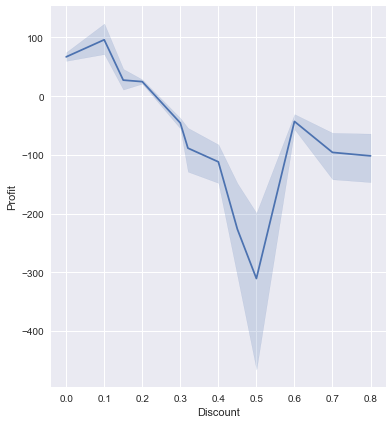

In [47]:
plt.figure(figsize = (6,7))
sns.lineplot(dataset['Discount'], dataset['Profit'], data=dataset)

   # Visualizing Sales vs Profits 

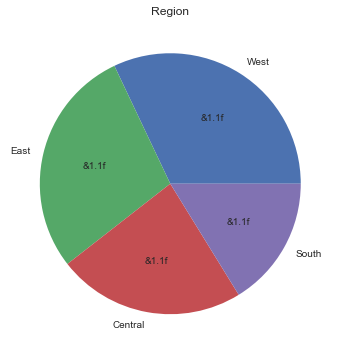

In [51]:
#pie chart between region and profit
plt.figure(figsize = (6,6))
plt.title('Region')
plt.pie(dataset['Region'].value_counts(), labels=dataset['Region'].value_counts().index, autopct = '&1.1f')
plt.show()

The graph shows that west and east have same profit through sales as East are less compared to west

# Visualizing sales vs profit in different states

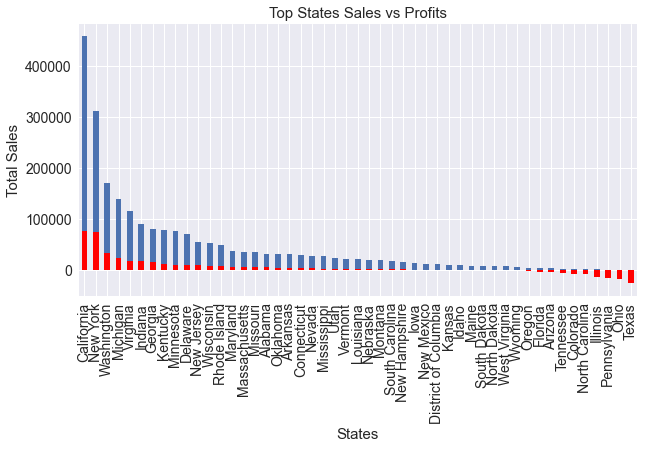

In [53]:
#Computing  the top states in terms of sales from first 100 observations
top_states_s = dataset.groupby("State").Sales.sum().nlargest(n=100)
#Computing  the top states in terms of profit from first 100 observations
top_states_p = dataset.groupby("State").Profit.sum().nlargest(n=100)

#Plotting to see it visually
plt.style.use('seaborn')
top_states_s.plot(kind='bar', figsize=(10,5), fontsize=14)
top_states_p.plot(kind='bar', figsize=(10,5), fontsize=14, color='red')
plt.xlabel('States',fontsize=15)
plt.ylabel('Total Sales', fontsize=15)
plt.title('Top States Sales vs Profits', fontsize=15)
plt.show()

# Checking the interdependency of Sales,Profits and Discounts

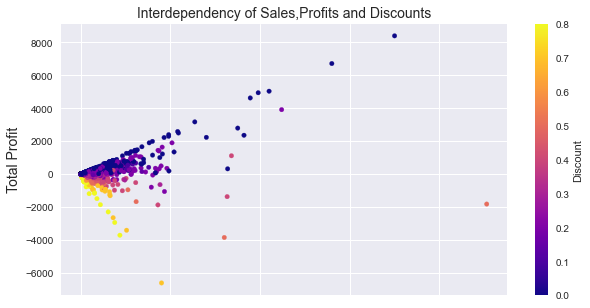

In [65]:
plt.style.use('seaborn')
dataset.plot(kind='scatter', figsize=(10,5), x='Sales', y='Profit', c='Discount', colormap='plasma')
plt.ylabel('Total Profit', fontsize = 14)
plt.title('Interdependency of Sales,Profits and Discounts', fontsize=14)
plt.show()

Above graph clearly shows that if we give more discount on our products sales increases but profit decreases

# Conclusion

The weak areas one should work for more profit are:
1. We should limit the sales of furniture that of technology and office suppliers as less furniture has very less profit     compared to sales.
2. Considering sub-categories, sales of tables should be minimized.
3. We should concentrate on states like "NewYork" and "California" to gain more profits